<a href="https://colab.research.google.com/github/idarapatrick/Math-for-ML-Summative/blob/main/Idara_Patrick_Essien_Summative_Assessment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summative Assessment

data source = [Access it here](https://ncdrisc.org/data-downloads-hypertension.html)

In [56]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pydantic
import seaborn as sns

In [57]:
data = pd.read_csv('hypertension_by_country.csv')

data.tail(20)

,Country,ISO,Sex,Year,Age,Prevalence of hypertension,Prevalence of hypertension lower 95% uncertainty interval,Prevalence of hypertension upper 95% uncertainty interval,Proportion of diagnosed hypertension among all hypertension,Proportion of diagnosed hypertension among all hypertension lower 95% uncertainty interval,Proportion of diagnosed hypertension among all hypertension upper 95% uncertainty interval,Proportion of treated hypertension among all hypertension,Proportion of treated hypertension among all hypertension lower 95% uncertainty interval,Proportion of treated hypertension among all hypertension upper 95% uncertainty interval,Proportion of controlled hypertension among all hypertension,Proportion of controlled hypertension among all hypertension lower 95% uncertainty interval,Proportion of controlled hypertension among all hypertension upper 95% uncertainty interval,Proportion of untreated stage 2 hypertension among all hypertension,Proportion of untreated stage 2 hypertension among all hypertension lower 95% uncertainty interval,Proportion of untreated stage 2 hypertension among all hypertension upper 95% uncertainty interval
119980,Zimbabwe,ZWE,Women,2000,75-79,0.699115,0.517543,0.845350,0.380472,0.132584,0.678050,0.240470,0.049351,0.543309,0.044166,0.002774,0.162251,0.464773,0.237457,0.699977
119981,Zimbabwe,ZWE,Women,2001,75-79,0.704951,0.528427,0.848145,0.388598,0.138910,0.686895,0.255064,0.055619,0.557103,0.049061,0.003381,0.173801,0.452432,0.232304,0.684902
119982,Zimbabwe,ZWE,Women,2002,75-79,0.710962,0.540613,0.851430,0.397176,0.144272,0.695655,0.270562,0.061754,0.577205,0.054545,0.004107,0.185702,0.439825,0.223671,0.667844
119983,Zimbabwe,ZWE,Women,2003,75-79,0.717117,0.550763,0.854310,0.406221,0.147990,0.701175,0.286967,0.069559,0.598078,0.060671,0.005064,0.199258,0.426990,0.214642,0.654203
119984,Zimbabwe,ZWE,Women,2004,75-79,0.723174,0.558263,0.856592,0.415914,0.153863,0.708562,0.303904,0.077866,0.615430,0.067439,0.006187,0.215813,0.413895,0.206253,0.639992
119985,Zimbabwe,ZWE,Women,2005,75-79,0.728939,0.562862,0.859905,0.426063,0.163312,0.714312,0.321229,0.088283,0.637643,0.074806,0.007263,0.232500,0.400527,0.196506,0.625250
119986,Zimbabwe,ZWE,Women,2006,75-79,0.734339,0.567502,0.864597,0.436977,0.173088,0.722027,0.338629,0.096726,0.658403,0.082776,0.008610,0.252877,0.386924,0.187767,0.612810
119987,Zimbabwe,ZWE,Women,2007,75-79,0.739230,0.572846,0.867729,0.448681,0.182562,0.733163,0.355888,0.104813,0.673414,0.091289,0.010425,0.271961,0.373091,0.178658,0.596895
119988,Zimbabwe,ZWE,Women,2008,75-79,0.743442,0.580531,0.872590,0.461356,0.193124,0.745698,0.372970,0.113660,0.689534,0.100287,0.012340,0.293467,0.359020,0.166537,0.581866
119989,Zimbabwe,ZWE,Women,2009,75-79,0.746821,0.584648,0.875686,0.475093,0.202480,0.757784,0.389744,0.122506,0.702336,0.109924,0.014321,0.314101,0.344612,0.156302,0.567972


# Data Exploration

We will start by exploring our data to understand what rows need to be dropped, what rows to convert to numerical data, null values, etc.

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 20 columns):
 #   Column                                                                                              Non-Null Count   Dtype  
---  ------                                                                                              --------------   -----  
 0   Country                                                                                             120000 non-null  object 
 1   ISO                                                                                                 120000 non-null  object 
 2   Sex                                                                                                 120000 non-null  object 
 3   Year                                                                                                120000 non-null  int64  
 4   Age                                                                                                 1200

In [35]:
data.describe()

,Year,Prevalence of hypertension,Prevalence of hypertension lower 95% uncertainty interval,Prevalence of hypertension upper 95% uncertainty interval,Proportion of diagnosed hypertension among all hypertension,Proportion of diagnosed hypertension among all hypertension lower 95% uncertainty interval,Proportion of diagnosed hypertension among all hypertension upper 95% uncertainty interval,Proportion of treated hypertension among all hypertension,Proportion of treated hypertension among all hypertension lower 95% uncertainty interval,Proportion of treated hypertension among all hypertension upper 95% uncertainty interval,Proportion of controlled hypertension among all hypertension,Proportion of controlled hypertension among all hypertension lower 95% uncertainty interval,Proportion of controlled hypertension among all hypertension upper 95% uncertainty interval,Proportion of untreated stage 2 hypertension among all hypertension,Proportion of untreated stage 2 hypertension among all hypertension lower 95% uncertainty interval,Proportion of untreated stage 2 hypertension among all hypertension upper 95% uncertainty interval
count,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000,120000.000000
mean,2004.500000,0.450951,0.350988,0.552338,0.431314,0.297986,0.573750,0.304838,0.189009,0.444910,0.109975,0.050698,0.205606,0.236736,0.144472,0.346933
std,8.655478,0.201161,0.187178,0.210886,0.189941,0.183002,0.190773,0.191739,0.166878,0.213294,0.098107,0.070221,0.137822,0.103601,0.073799,0.141098
min,1990.000000,0.014657,0.005478,0.024653,0.023489,0.002295,0.059533,0.006990,0.000193,0.021629,0.002353,0.000006,0.008290,0.009317,0.004689,0.016823
25%,1997.000000,0.278233,0.188271,0.379410,0.279765,0.147946,0.433743,0.145272,0.055522,0.270899,0.040246,0.007641,0.100968,0.162967,0.090017,0.244965
50%,2004.500000,0.466549,0.350937,0.575994,0.419332,0.266925,0.579814,0.268717,0.136819,0.428821,0.079210,0.024071,0.171179,0.219999,0.131291,0.327394
75%,2012.000000,0.615678,0.493883,0.731560,0.575257,0.424981,0.724505,0.437762,0.282441,0.609427,0.146944,0.063714,0.276538,0.293329,0.183413,0.433533
max,2019.000000,0.901506,0.828089,0.975754,0.929282,0.856479,0.979693,0.915023,0.865445,0.972517,0.750338,0.654694,0.848906,0.739173,0.516717,0.938160


In [36]:
data.shape

(120000, 20)

# Feature Engineering

Our data depicts that there are 120000 rows and 20 columns, a large dataset! We will perform feature engineering and drop columns that aren't relevant in our data.

* We will drop countries that are not in Africa since our sole aim is to predict the prevalence of hypertension in different African countries.
* Drop the rows containing data before year 2015 to work with recent data.
* Convert the `Sex` column to numeric data, with male being 0 and female being 1 for scikit-learn
* Convert the age column to numeric data in order to check the correlation and plot a correlation heatmap to determine what columns are relevant and hold more weight than others

Working with data grouped in fractions or percentages like the `Proportion of diagnosed hypertension among all hypertension lower 95% uncertainty interval` column is not important to us as the data from the `Proportion of diagnosed hypertension among all hypertension` column.

This returns a dataset with data relevant to what we are working with.

In [62]:
countries = [
    "Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi",
    "Cabo Verde", "Cameroon", "Central African Republic", "Chad", "Comoros",
    "Democratic Republic of the Congo", "Republic of the Congo", "Côte d'Ivoire",
    "Djibouti", "Egypt", "Equatorial Guinea", "Eritrea", "Eswatini", "Ethiopia",
    "Gabon", "Gambia", "Ghana", "Guinea", "Guinea-Bissau", "Kenya", "Lesotho",
    "Liberia", "Libya", "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius",
    "Morocco", "Mozambique", "Namibia", "Niger", "Nigeria", "Rwanda",
    "Sao Tome and Principe", "Senegal", "Seychelles", "Sierra Leone", "Somalia",
    "South Africa", "South Sudan", "Sudan", "Tanzania", "Togo", "Tunisia",
    "Uganda", "Zambia", "Zimbabwe"
]

# filter dataset to get only African countries from year 2015 and above
africa = data[
    (data['Country'].isin(countries)) &
    (data['Year'] >= 2010)
].reset_index(drop=True)

# store the dataset with African countries in a csv
africa.to_csv('africa.csv', index=False)

#Convert Sex to binary, 0s and 1s
#sex_mapping = {'Men': 0, 'Women': 1}
#africa['Sex_binary'] = africa['Sex'].map(sex_mapping)


africa.tail(20)


,Country,ISO,Sex,Year,Age,Prevalence of hypertension,Prevalence of hypertension lower 95% uncertainty interval,Prevalence of hypertension upper 95% uncertainty interval,Proportion of diagnosed hypertension among all hypertension,Proportion of diagnosed hypertension among all hypertension lower 95% uncertainty interval,Proportion of diagnosed hypertension among all hypertension upper 95% uncertainty interval,Proportion of treated hypertension among all hypertension,Proportion of treated hypertension among all hypertension lower 95% uncertainty interval,Proportion of treated hypertension among all hypertension upper 95% uncertainty interval,Proportion of controlled hypertension among all hypertension,Proportion of controlled hypertension among all hypertension lower 95% uncertainty interval,Proportion of controlled hypertension among all hypertension upper 95% uncertainty interval,Proportion of untreated stage 2 hypertension among all hypertension,Proportion of untreated stage 2 hypertension among all hypertension lower 95% uncertainty interval,Proportion of untreated stage 2 hypertension among all hypertension upper 95% uncertainty interval
9780,Zambia,ZMB,Women,2010,75-79,0.718703,0.602969,0.821289,0.445946,0.282615,0.620752,0.254246,0.126459,0.417212,0.039127,0.008705,0.099011,0.421775,0.283461,0.565248
9781,Zambia,ZMB,Women,2011,75-79,0.717854,0.604922,0.820018,0.460676,0.295035,0.635589,0.266559,0.134138,0.430334,0.045458,0.010508,0.110831,0.405860,0.269353,0.550165
9782,Zambia,ZMB,Women,2012,75-79,0.716170,0.601717,0.818612,0.476156,0.306371,0.651506,0.279335,0.142012,0.445520,0.052962,0.013019,0.125578,0.389543,0.253546,0.535034
9783,Zambia,ZMB,Women,2013,75-79,0.713822,0.598703,0.816653,0.492484,0.319083,0.668460,0.292348,0.149601,0.466327,0.061747,0.015602,0.145751,0.373008,0.235478,0.521268
9784,Zambia,ZMB,Women,2014,75-79,0.710957,0.592347,0.815762,0.509351,0.330765,0.686830,0.305541,0.157009,0.484861,0.071847,0.018315,0.164757,0.356490,0.217540,0.508663
9785,Zambia,ZMB,Women,2015,75-79,0.707605,0.584764,0.816197,0.526527,0.341324,0.708317,0.318828,0.162615,0.506140,0.083236,0.021745,0.189863,0.340070,0.199773,0.496257
9786,Zambia,ZMB,Women,2016,75-79,0.703800,0.575347,0.816901,0.544128,0.349907,0.729603,0.332538,0.167589,0.527257,0.096122,0.025497,0.220521,0.323753,0.182126,0.486908
9787,Zambia,ZMB,Women,2017,75-79,0.699666,0.564007,0.818138,0.561613,0.359514,0.752804,0.346244,0.170209,0.550594,0.110447,0.028198,0.254582,0.307884,0.163674,0.478218
9788,Zambia,ZMB,Women,2018,75-79,0.695304,0.548630,0.820857,0.579020,0.367632,0.778499,0.360354,0.170939,0.576800,0.126690,0.030564,0.293817,0.292507,0.144447,0.471118
9789,Zambia,ZMB,Women,2019,75-79,0.690864,0.533487,0.826205,0.596037,0.369675,0.804713,0.374659,0.170591,0.604186,0.144683,0.032719,0.340573,0.277697,0.125816,0.462816


In [64]:
# Drop columns not relevant
africa = africa.drop(columns=["ISO",
                              "Prevalence of hypertension lower 95% uncertainty interval",
                              "Prevalence of hypertension upper 95% uncertainty interval",
                              "Proportion of diagnosed hypertension among all hypertension lower 95% uncertainty interval",
                              "Proportion of diagnosed hypertension among all hypertension upper 95% uncertainty interval",
                              "Proportion of diagnosed hypertension among all hypertension lower 95% uncertainty interval",
                              "Proportion of diagnosed hypertension among all hypertension upper 95% uncertainty interval",
                              "Proportion of treated hypertension among all hypertension lower 95% uncertainty interval",
                              "Proportion of treated hypertension among all hypertension upper 95% uncertainty interval",
                              "Proportion of controlled hypertension among all hypertension lower 95% uncertainty interval",
                              "Proportion of controlled hypertension among all hypertension upper 95% uncertainty interval",
                              "Proportion of untreated stage 2 hypertension among all hypertension lower 95% uncertainty interval",
                              "Proportion of untreated stage 2 hypertension among all hypertension upper 95% uncertainty interval"]).reset_index(drop=True)


In [65]:
africa.columns

Index(['Country', 'Sex', 'Year', 'Age', 'Prevalence of hypertension',
       'Proportion of diagnosed hypertension among all hypertension',
       'Proportion of treated hypertension among all hypertension',
       'Proportion of controlled hypertension among all hypertension',
       'Proportion of untreated stage 2 hypertension among all hypertension'],
      dtype='object')

In [67]:

numeric_africa = pd.get_dummies(africa, columns=['Sex'])
numeric_africa.head()

,Country,Year,Age,Prevalence of hypertension,Proportion of diagnosed hypertension among all hypertension,Proportion of treated hypertension among all hypertension,Proportion of controlled hypertension among all hypertension,Proportion of untreated stage 2 hypertension among all hypertension,Sex_Men,Sex_Women
0,Algeria,2010,30-34,0.145276,0.086184,0.040991,0.019259,0.112474,True,False
1,Algeria,2011,30-34,0.145232,0.089373,0.041877,0.020358,0.111261,True,False
2,Algeria,2012,30-34,0.145073,0.092443,0.042518,0.021352,0.110368,True,False
3,Algeria,2013,30-34,0.144930,0.095435,0.042910,0.022179,0.109710,True,False
4,Algeria,2014,30-34,0.144777,0.098326,0.043070,0.022798,0.109269,True,False


In [68]:
africa.select_dtypes(include='object').columns

Index(['Country', 'Sex', 'Age'], dtype='object')

# Correlation Heatmap

## Understanding Our Visualizations: Two Heatmaps
### Heatmap 1
In this analysis, we will generate two distinct heatmaps to gain different insights from our hypertension prevalence data in African countries:

1.  **Hypertension Prevalence Across Age Groups and Countries Heatmap:** This initial heatmap will visualized the *average prevalence values* of hypertension across different age groups and selected countries. Its purpose is to show the distribution and patterns of hypertension prevalence across these categorical variables, allowing for easy comparison of prevalence levels between age groups and countries. This heatmap will help us understand the raw prevalence figures in a structured way.

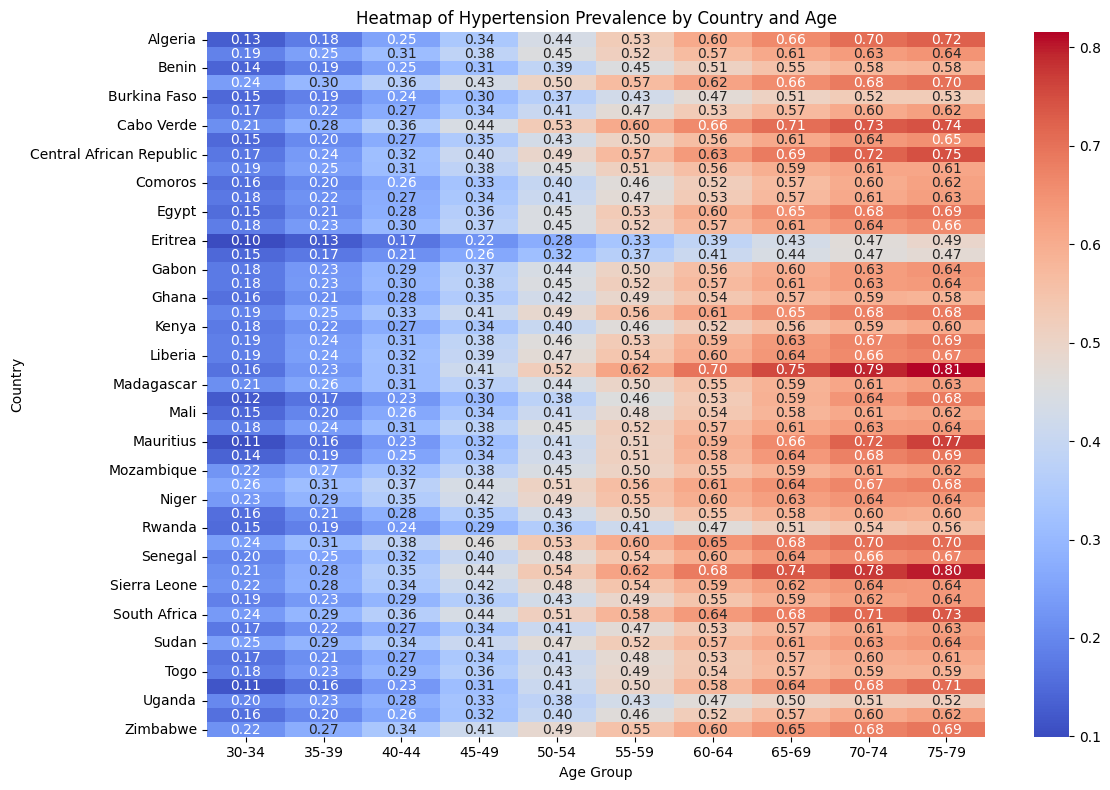

In [39]:
africa_avg = (
    africa
    .groupby(['Country', 'Age'])['Prevalence of hypertension']
    .mean()
    .reset_index()
)

pivot = africa_avg.pivot(index='Country', columns='Age', values='Prevalence of hypertension')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Heatmap of Hypertension Prevalence by Country and Age')
plt.xlabel('Age Group')
plt.ylabel('Country')
plt.tight_layout()
plt.show()



### Heatmap 2

2.  **Correlation Heatmap of Numeric Columns with Age Groups:** The second heatmap is a *correlation matrix visualization*. Before generating this, we converted the 'Age' ranges into a numerical format ('Age_encoded') using Ordinal Encoding to make it compatible with correlation calculations and machine learning algorithms. This heatmap shows the **pairwise linear correlation coefficients** between all the numerical variables in our dataset, including the encoded age.

    This second heatmap is particularly important for preparing our data for **scikit-learn and other machine learning models**. Machine learning algorithms typically require numerical input. By calculating and visualizing the correlation matrix of our numerical features (including the encoded age), we can:
    *   Identify which features are strongly correlated with our target variable (likely 'Prevalence of hypertension').
    *   Understand the relationships between different predictor variables.
    *   Inform feature selection decisions for building a predictive model.

By using both heatmaps, we get a comprehensive view: the first shows the actual prevalence distribution, and the second reveals the statistical relationships between numerical factors, which is essential for building a predictive model using the scikit-learn library

**Prior Task**

 First, we will define a dictionary to map the ordered age ranges to numerical values and apply this mapping to the 'Age' column to create a new numerical column 'Age_encoded'.

In [51]:
age_order = ['30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']
age_mapping_ordinal = {age_group: i for i, age_group in enumerate(age_order)}

africa['Age_encoded'] = africa['Age'].map(age_mapping_ordinal)

# Display the head of the DataFrame to show the new column
display(africa.tail())


# Display info to confirm the change
africa.info()

,Country,Sex,Year,Age,Prevalence of hypertension,Proportion of diagnosed hypertension among all hypertension,Proportion of treated hypertension among all hypertension,Proportion of controlled hypertension among all hypertension,Proportion of untreated stage 2 hypertension among all hypertension,Sex_binary,Age_encoded
9795,Zimbabwe,Women,2015,75-79,0.754232,0.562612,0.480481,0.180882,0.261676,1,9
9796,Zimbabwe,Women,2016,75-79,0.754229,0.576549,0.493870,0.194451,0.249279,1,9
9797,Zimbabwe,Women,2017,75-79,0.753988,0.589891,0.506624,0.208217,0.237500,1,9
9798,Zimbabwe,Women,2018,75-79,0.753559,0.602876,0.519298,0.222899,0.226335,1,9
9799,Zimbabwe,Women,2019,75-79,0.752954,0.615547,0.531769,0.238253,0.215712,1,9


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 11 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Country                                                              9800 non-null   object 
 1   Sex                                                                  9800 non-null   object 
 2   Year                                                                 9800 non-null   int64  
 3   Age                                                                  9800 non-null   object 
 4   Prevalence of hypertension                                           9800 non-null   float64
 5   Proportion of diagnosed hypertension among all hypertension          9800 non-null   float64
 6   Proportion of treated hypertension among all hypertension            9800 non-null   float64
 7   Propor

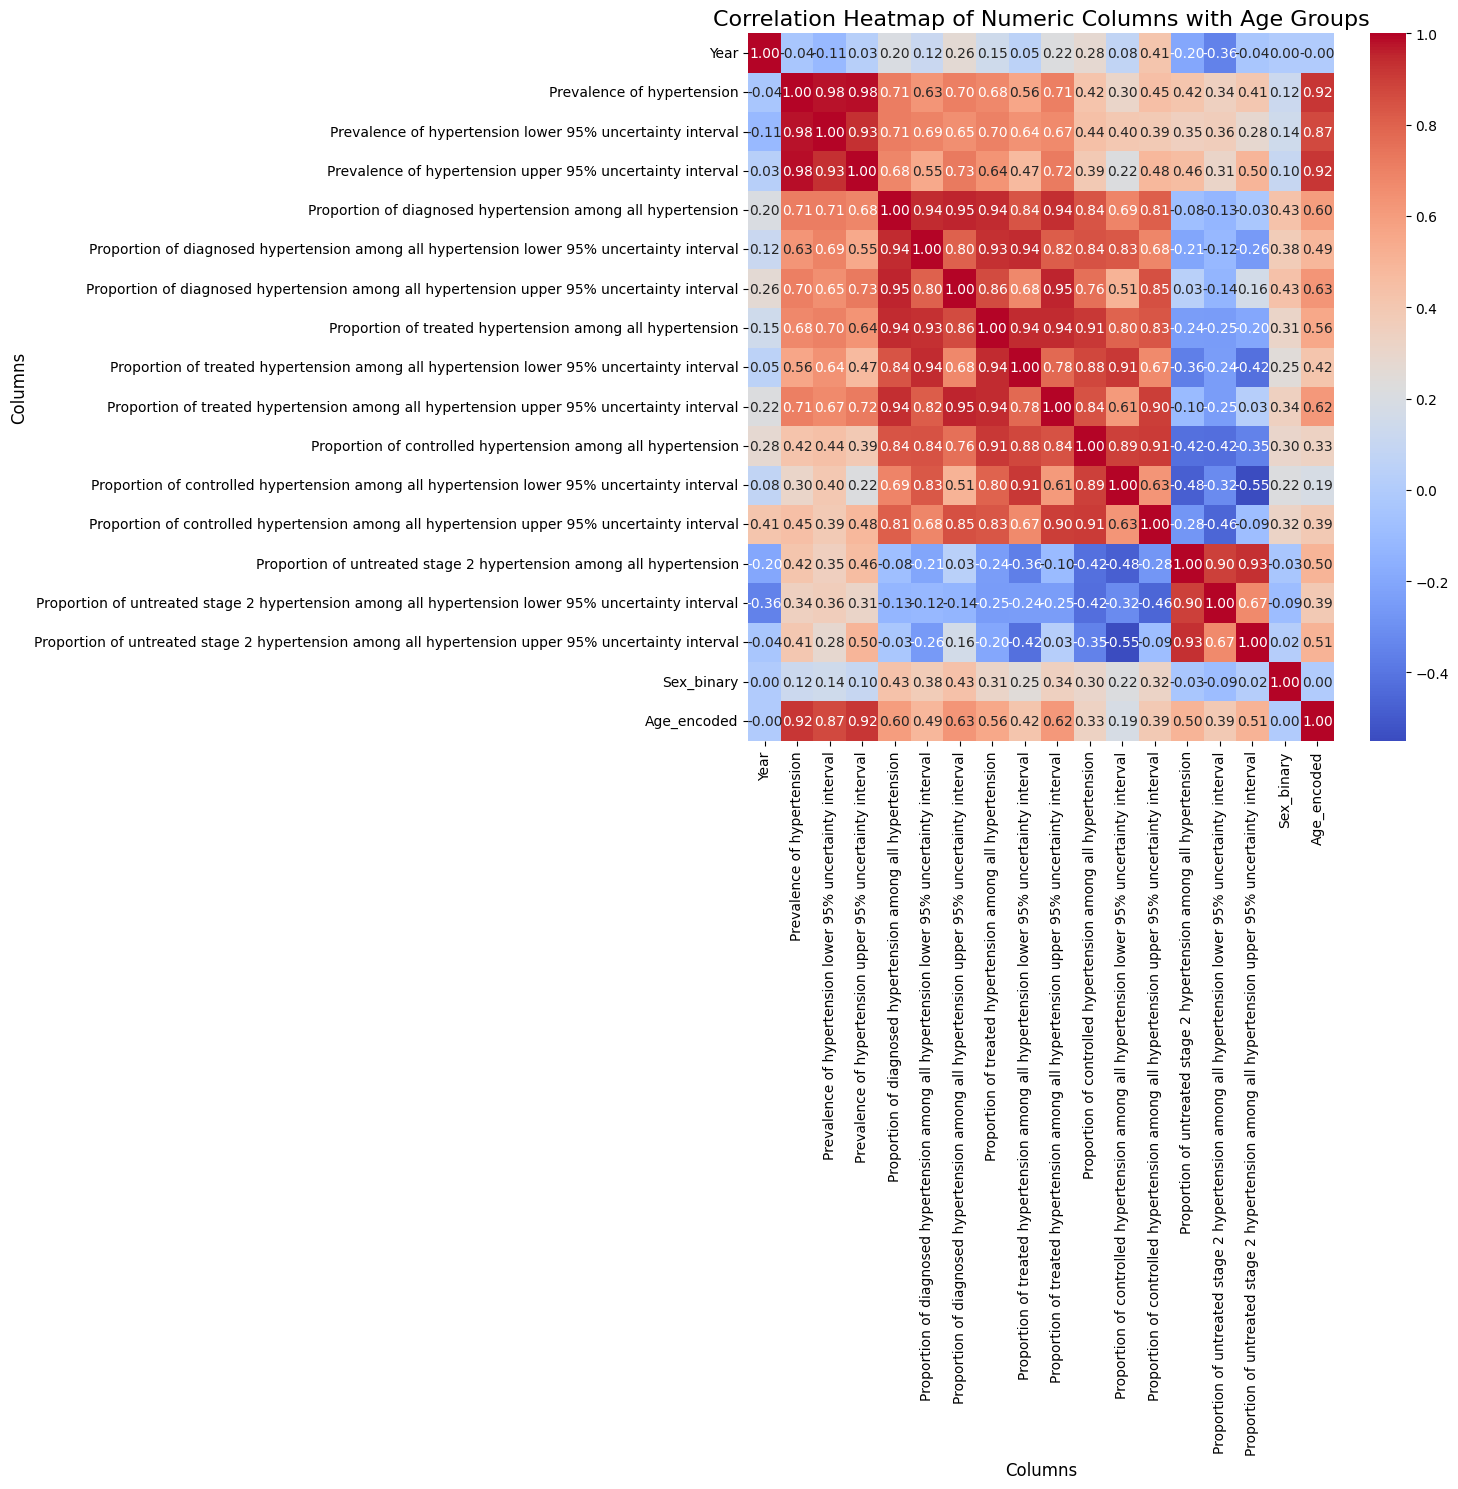


 CORRELATION MATRIX


,Year,Prevalence of hypertension,Prevalence of hypertension lower 95% uncertainty interval,Prevalence of hypertension upper 95% uncertainty interval,Proportion of diagnosed hypertension among all hypertension,Proportion of diagnosed hypertension among all hypertension lower 95% uncertainty interval,Proportion of diagnosed hypertension among all hypertension upper 95% uncertainty interval,Proportion of treated hypertension among all hypertension,Proportion of treated hypertension among all hypertension lower 95% uncertainty interval,Proportion of treated hypertension among all hypertension upper 95% uncertainty interval,Proportion of controlled hypertension among all hypertension,Proportion of controlled hypertension among all hypertension lower 95% uncertainty interval,Proportion of controlled hypertension among all hypertension upper 95% uncertainty interval,Proportion of untreated stage 2 hypertension among all hypertension,Proportion of untreated stage 2 hypertension among all hypertension lower 95% uncertainty interval,Proportion of untreated stage 2 hypertension among all hypertension upper 95% uncertainty interval,Sex_binary,Age_encoded
Year,1.000000e+00,-0.037969,-0.111386,0.028303,0.204526,0.115349,0.262951,0.145035,0.053002,0.217327,0.276095,0.075722,0.414071,-0.199045,-0.355214,-0.039030,4.220630e-14,-2.223177e-13
Prevalence of hypertension,-3.796900e-02,1.000000,0.979119,0.984054,0.709617,0.627762,0.704663,0.678569,0.558424,0.707326,0.422448,0.304361,0.446355,0.415751,0.342540,0.405220,1.241117e-01,9.171761e-01
Prevalence of hypertension lower 95% uncertainty interval,-1.113865e-01,0.979119,1.000000,0.928307,0.714093,0.693532,0.654319,0.702404,0.641141,0.669803,0.442405,0.397787,0.388321,0.350955,0.360838,0.282067,1.449153e-01,8.717098e-01
Prevalence of hypertension upper 95% uncertainty interval,2.830297e-02,0.984054,0.928307,1.000000,0.682570,0.551546,0.726004,0.636236,0.471491,0.716691,0.391885,0.216173,0.481465,0.455664,0.313562,0.496478,1.029482e-01,9.211987e-01
Proportion of diagnosed hypertension among all hypertension,2.045262e-01,0.709617,0.714093,0.682570,1.000000,0.942243,0.953873,0.944378,0.840277,0.936343,0.838398,0.687291,0.812194,-0.079922,-0.129548,-0.033259,4.303556e-01,5.970479e-01
Proportion of diagnosed hypertension among all hypertension lower 95% uncertainty interval,1.153489e-01,0.627762,0.693532,0.551546,0.942243,1.000000,0.801023,0.933354,0.942123,0.816210,0.844713,0.828429,0.684272,-0.208093,-0.118843,-0.256693,3.765282e-01,4.880701e-01
Proportion of diagnosed hypertension among all hypertension upper 95% uncertainty interval,2.629512e-01,0.704663,0.654319,0.726004,0.953873,0.801023,1.000000,0.864216,0.675010,0.953699,0.757789,0.508610,0.849570,0.032767,-0.136825,0.161928,4.341717e-01,6.255081e-01
Proportion of treated hypertension among all hypertension,1.450349e-01,0.678569,0.702404,0.636236,0.944378,0.933354,0.864216,1.000000,0.939756,0.943862,0.909354,0.797901,0.832253,-0.242090,-0.251511,-0.203307,3.124314e-01,5.565350e-01
Proportion of treated hypertension among all hypertension lower 95% uncertainty interval,5.300241e-02,0.558424,0.641141,0.471491,0.840277,0.942123,0.675010,0.939756,1.000000,0.778002,0.877930,0.912119,0.669273,-0.364258,-0.241215,-0.416472,2.478917e-01,4.159050e-01
Proportion of treated hypertension among all hypertension upper 95% uncertainty interval,2.173275e-01,0.707326,0.669803,0.716691,0.936343,0.816210,0.953699,0.943862,0.778002,1.000000,0.843304,0.611751,0.901100,-0.102989,-0.246092,0.025407,3.412600e-01,6.181512e-01


In [41]:
# Calculate the correlation matrix using the DataFrame with 'Age_encoded'
# Ensure only numeric columns are included in the correlation calculation
numeric_africa = africa.select_dtypes(include=np.number)
correlation_matrix = numeric_africa.corr()

# Generate the heatmap
plt.figure(figsize=(15, 15)) # Increased figure size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')

# Map 'Age_encoded' values back to original 'Age' labels for visualization
age_order = ['30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+']
column_labels = list(correlation_matrix.columns)

# Replace 'Age_encoded' label with age group labels on the x and y axes
if 'Age_encoded' in column_labels:
    age_encoded_index = column_labels.index('Age_encoded')
    # Create a list of labels for the x-axis, replacing 'Age_encoded' with the ordered age groups
    x_labels = [age_order[i] if col == 'Age_encoded' and i < len(age_order) else col for i, col in enumerate(column_labels)]
    # Create a list of labels for the y-axis, replacing 'Age_encoded' with the ordered age groups
    y_labels = [age_order[i] if col == 'Age_encoded' and i < len(age_order) else col for i, col in enumerate(column_labels)]

    plt.xticks(ticks=np.arange(len(column_labels)) + 0.5, labels=x_labels, rotation=90)
    plt.yticks(ticks=np.arange(len(column_labels)) + 0.5, labels=y_labels)
else:
    # If 'Age_encoded' is not in columns, use the original column labels
    plt.xticks(ticks=np.arange(len(column_labels)) + 0.5, labels=column_labels, rotation=90)
    plt.yticks(ticks=np.arange(len(column_labels)) + 0.5, labels=column_labels)


plt.title('Correlation Heatmap of Numeric Columns with Age Groups', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Columns', fontsize=12)
plt.tight_layout()
plt.show()

print("\n CORRELATION MATRIX")
display(correlation_matrix)

## Dropping less relevant columns

From the heatmap, we can see that they are lots of columns that are not related to the relevant columns we need `Prevalence of Hypertension`, `Sex_binary`, `Age_encoded`, so we will drop them.

In [42]:
for i, col in enumerate(africa.columns):
  print(f"Index: {i}, Column: {col}")


Index: 0, Column: Country
Index: 1, Column: ISO
Index: 2, Column: Sex
Index: 3, Column: Year
Index: 4, Column: Age
Index: 5, Column: Prevalence of hypertension
Index: 6, Column: Prevalence of hypertension lower 95% uncertainty interval
Index: 7, Column: Prevalence of hypertension upper 95% uncertainty interval
Index: 8, Column: Proportion of diagnosed hypertension among all hypertension
Index: 9, Column: Proportion of diagnosed hypertension among all hypertension lower 95% uncertainty interval
Index: 10, Column: Proportion of diagnosed hypertension among all hypertension upper 95% uncertainty interval
Index: 11, Column: Proportion of treated hypertension among all hypertension
Index: 12, Column: Proportion of treated hypertension among all hypertension lower 95% uncertainty interval
Index: 13, Column: Proportion of treated hypertension among all hypertension upper 95% uncertainty interval
Index: 14, Column: Proportion of controlled hypertension among all hypertension
Index: 15, Column:

In [43]:
# Drop columns not relevant
africa = africa.drop(columns=["ISO",
                              "Prevalence of hypertension lower 95% uncertainty interval",
                              "Prevalence of hypertension upper 95% uncertainty interval",
                              "Proportion of diagnosed hypertension among all hypertension lower 95% uncertainty interval",
                              "Proportion of diagnosed hypertension among all hypertension upper 95% uncertainty interval",
                              "Proportion of diagnosed hypertension among all hypertension lower 95% uncertainty interval",
                              "Proportion of diagnosed hypertension among all hypertension upper 95% uncertainty interval",
                              "Proportion of treated hypertension among all hypertension lower 95% uncertainty interval",
                              "Proportion of treated hypertension among all hypertension upper 95% uncertainty interval",
                              "Proportion of controlled hypertension among all hypertension lower 95% uncertainty interval",
                              "Proportion of controlled hypertension among all hypertension upper 95% uncertainty interval",
                              "Proportion of untreated stage 2 hypertension among all hypertension lower 95% uncertainty interval",
                              "Proportion of untreated stage 2 hypertension among all hypertension upper 95% uncertainty interval"]).reset_index(drop=True)


In [44]:
africa.tail(10)

,Country,Sex,Year,Age,Prevalence of hypertension,Proportion of diagnosed hypertension among all hypertension,Proportion of treated hypertension among all hypertension,Proportion of controlled hypertension among all hypertension,Proportion of untreated stage 2 hypertension among all hypertension,Sex_binary,Age_encoded
9790,Zimbabwe,Women,2010,75-79,0.749366,0.489406,0.406141,0.120220,0.330129,1,9
9791,Zimbabwe,Women,2011,75-79,0.751265,0.504073,0.422068,0.131179,0.315767,1,9
9792,Zimbabwe,Women,2012,75-79,0.752618,0.518882,0.437654,0.142855,0.301601,1,9
9793,Zimbabwe,Women,2013,75-79,0.753474,0.533797,0.452645,0.155090,0.287845,1,9
9794,Zimbabwe,Women,2014,75-79,0.754010,0.548413,0.466914,0.167794,0.274513,1,9
9795,Zimbabwe,Women,2015,75-79,0.754232,0.562612,0.480481,0.180882,0.261676,1,9
9796,Zimbabwe,Women,2016,75-79,0.754229,0.576549,0.493870,0.194451,0.249279,1,9
9797,Zimbabwe,Women,2017,75-79,0.753988,0.589891,0.506624,0.208217,0.237500,1,9
9798,Zimbabwe,Women,2018,75-79,0.753559,0.602876,0.519298,0.222899,0.226335,1,9
9799,Zimbabwe,Women,2019,75-79,0.752954,0.615547,0.531769,0.238253,0.215712,1,9


In [45]:
#check for categorical data and convert them to int
africa.select_dtypes(include='object').columns

Index(['Country', 'Sex', 'Age'], dtype='object')

In [58]:
le = LabelEncoder()
africa['Country_encoded'] = le.fit_transform(africa['Country'])

In [61]:
africa.tail()

,Country,Sex,Year,Age,Prevalence of hypertension,Proportion of diagnosed hypertension among all hypertension,Proportion of treated hypertension among all hypertension,Proportion of controlled hypertension among all hypertension,Proportion of untreated stage 2 hypertension among all hypertension,Sex_binary,Age_encoded,Country_encoded
9795,Zimbabwe,Women,2015,75-79,0.754232,0.562612,0.480481,0.180882,0.261676,1,9,48
9796,Zimbabwe,Women,2016,75-79,0.754229,0.576549,0.493870,0.194451,0.249279,1,9,48
9797,Zimbabwe,Women,2017,75-79,0.753988,0.589891,0.506624,0.208217,0.237500,1,9,48
9798,Zimbabwe,Women,2018,75-79,0.753559,0.602876,0.519298,0.222899,0.226335,1,9,48
9799,Zimbabwe,Women,2019,75-79,0.752954,0.615547,0.531769,0.238253,0.215712,1,9,48


## Filtering our data

Since the dataset has a lot of occurences for different years across each country, the best way to visualize our data is to select certain countries from the `africa` dataset to study the trends.

In [48]:
selected_countries = ["South Africa", "Nigeria", "Egypt", "Ethiopia", "Kenya", "Rwanda", "Tanzania", "Ghana"]
africa_filtered = africa[africa['Country'].isin(selected_countries)].reset_index(drop=True)
display(africa_filtered.head())

,Country,Sex,Year,Age,Prevalence of hypertension,Proportion of diagnosed hypertension among all hypertension,Proportion of treated hypertension among all hypertension,Proportion of controlled hypertension among all hypertension,Proportion of untreated stage 2 hypertension among all hypertension,Sex_binary,Age_encoded
0,Egypt,Men,2010,30-34,0.152690,0.183713,0.093730,0.044751,0.123160,0,0
1,Egypt,Men,2011,30-34,0.153862,0.183386,0.094753,0.046964,0.123156,0,0
2,Egypt,Men,2012,30-34,0.155053,0.182444,0.095270,0.049112,0.123578,0,0
3,Egypt,Men,2013,30-34,0.156365,0.180994,0.095295,0.051021,0.124337,0,0
4,Egypt,Men,2014,30-34,0.157817,0.179081,0.094865,0.052577,0.125401,0,0


## Create line plot

Generate a line plot using the filtered data, to visualize the prevalence of hypertension across age groups for the selected countries.



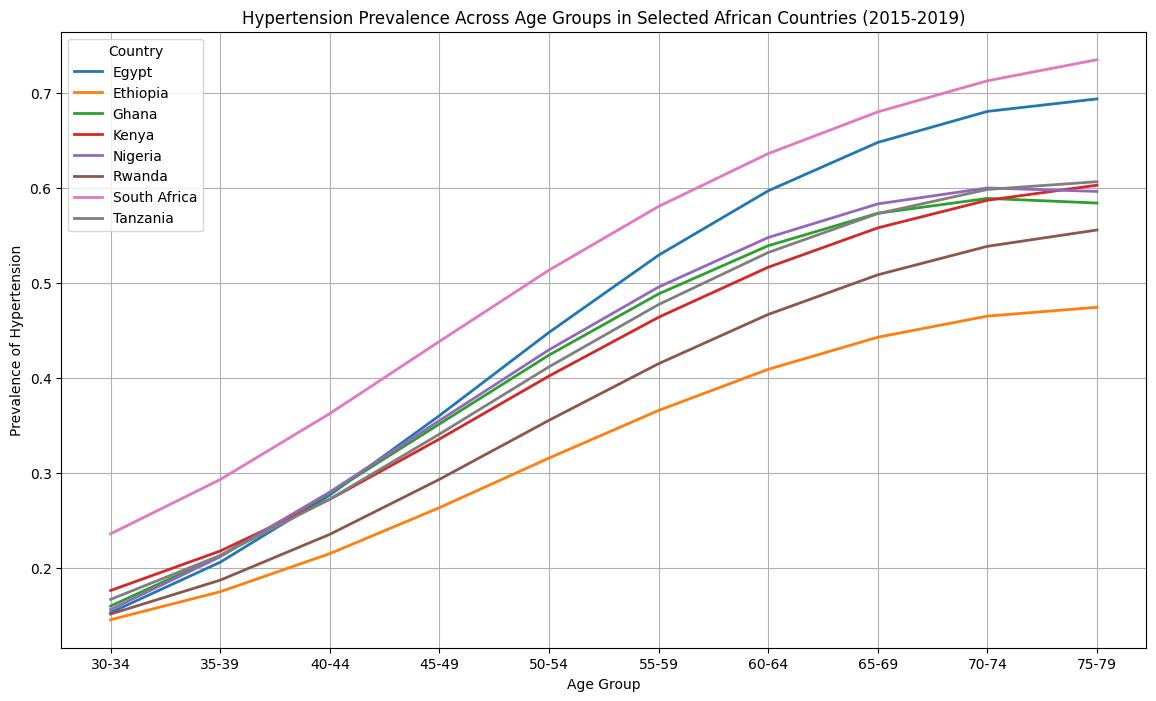

In [49]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=africa_filtered, x='Age',
             y='Prevalence of hypertension',
             hue = 'Country',
             estimator='mean',
             errorbar=None,
             markers=True,
             linewidth=2)
plt.title('Hypertension Prevalence Across Age Groups in Selected African Countries (2015-2019)')
plt.xlabel('Age Group')
plt.ylabel('Prevalence of Hypertension')
plt.grid(True)
plt.show()

## Enhance visualization

 Enhancing the existing line plot code to improve readability with appropriate labels, title, legend, and potentially rotated x-axis labels.


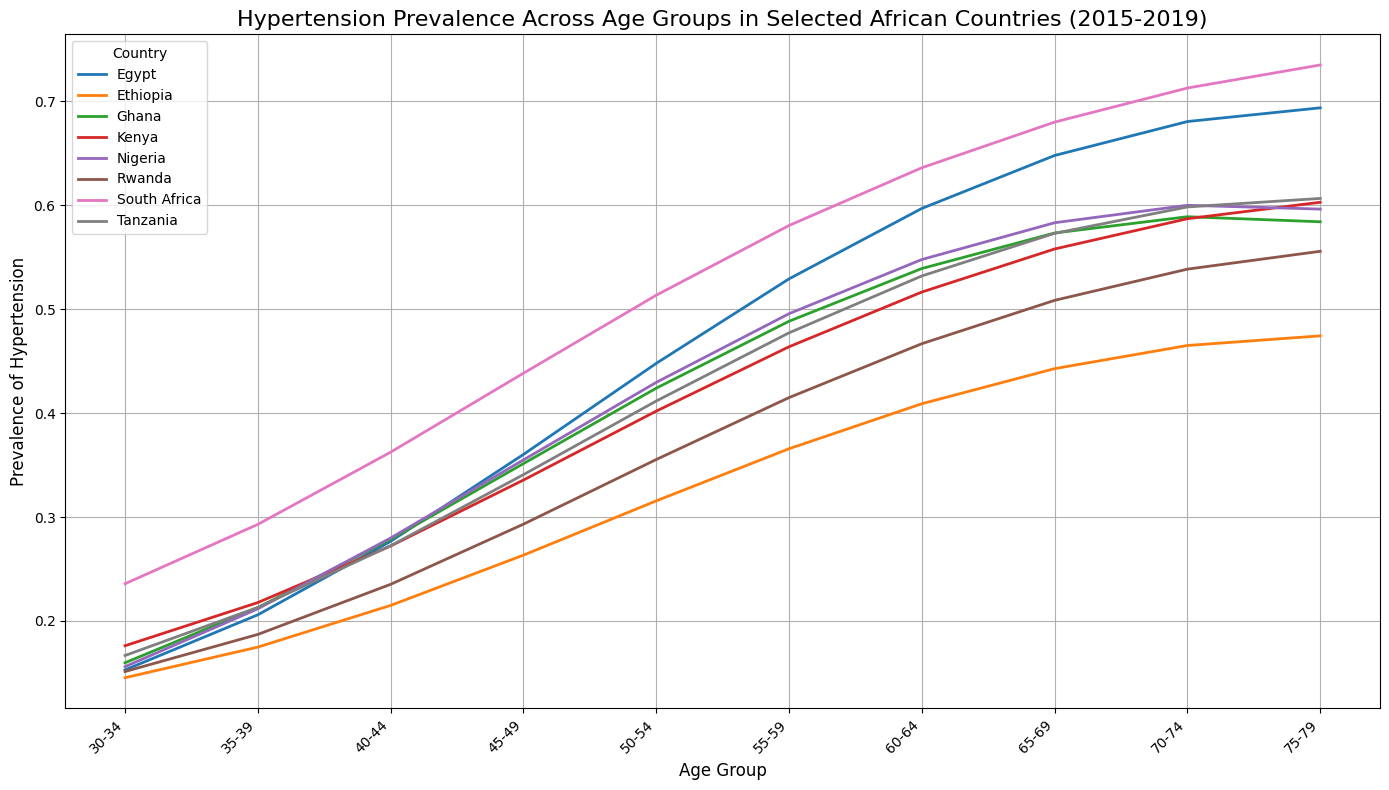

In [50]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=africa_filtered, x='Age',
             y='Prevalence of hypertension',
             hue = 'Country',
             estimator='mean',
             errorbar=None,
             markers=True,
             linewidth=2)
plt.title('Hypertension Prevalence Across Age Groups in Selected African Countries (2015-2019)', fontsize=16)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Prevalence of Hypertension', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()

## Data Analysis Key Findings

*   The analysis focused on hypertension prevalence in South Africa, Nigeria, Egypt, Ethiopia, Kenya, Rwanda, Tanzania, and Ghana.
*   A line plot was generated showing the mean prevalence of hypertension across different age groups for these countries.
*   The plot clearly illustrates the trend of increasing hypertension prevalence with age in all selected countries.

## Insights

* The data indicates that hypertension prevalence increases in older age groups, with South Africa having the highest prevalence across all age groups
*   Further analysis could investigate potential factors contributing to the observed differences in hypertension prevalence between these countries and age groups

